# Week2 Course

By Xijian Lim

Exploring Confounding Variables - ie. finding relationships between two sets of behaviour that occur together


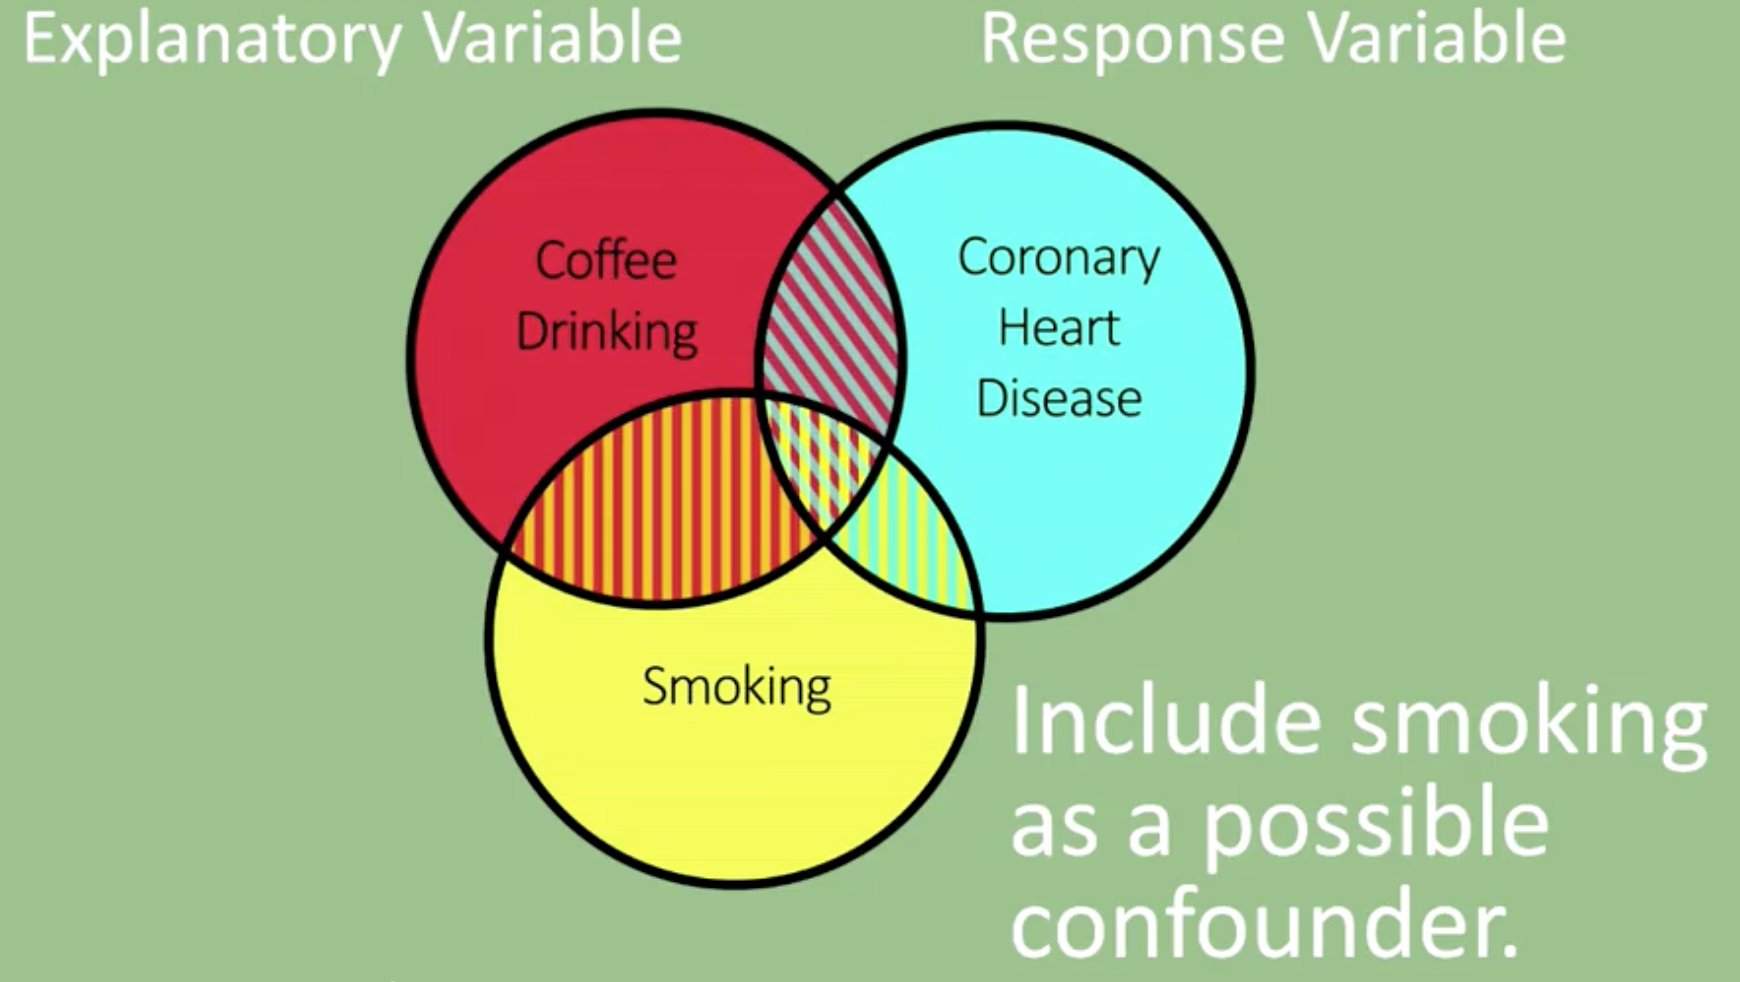

In [1]:
from IPython.display import Image
Image(filename='screenshot1.png') 

In [2]:
# using multivariate model to explain the overlap of all three items in the venn diagram

#multivariate is: multiple regression (quantitative response variable) + logistic regression (binary response variable)

In [5]:
#importing packages and data


#!pip install statsmodels --upgrade
import numpy as numpyp
import pandas as pandas
import statsmodels.api
import statsmodels.formula.api as smf

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

#call in data set
data = pandas.read_csv('~/Desktop/Coursera - data science/gapminder.csv')

# convert variables to numeric format using convert_objects function
data['internetuserate'] = pandas.to_numeric(data['internetuserate'], errors='coerce')
data['urbanrate'] = pandas.to_numeric(data['urbanrate'], errors='coerce')

/Users/xijianlim/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
# perfomring linear regression using statsmodel package

print('OLS regression for association between urban rate and internet usage')
reg1 = smf.ols('internetuserate ~ urbanrate', data=data).fit()
print(reg1.summary())

OLS regression for association between urban rate and internet usage
                            OLS Regression Results                            
Dep. Variable:        internetuserate   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     113.7
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           4.56e-21
Time:                        10:42:44   Log-Likelihood:                -856.14
No. Observations:                 190   AIC:                             1716.
Df Residuals:                     188   BIC:                             1723.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------


<font><font color=green><font size=15> once run you will see a summary of results </font>
<br>
<br>
<br>
<font><font color = black>F-statisic = 113.7 and p-value = 4.56e-21...much less than 0.05 which means we can reject null hypothesis</font>
<br>
<br>
<font><font color=black><font size=5>p-value for p>|t| is less than 0.0001 and R-square is 0.377, meaning 38% of response variable (internet use) can be explained by response variable (urban rate)</font>
<br>
<br>
<font> the urban rate coef is 0.72 and intercept coef is -4.9037; so if the urban rate is 80%, than the internet rate usage prediction is</font>
<font><font italic> -4.9 +.072 * 80 = 52.7%</font>

In [20]:
#example
intercept=-4.9037
urbanrate_coef=0.7202
urbanrate=80

pred_intuse=intercept+urbanrate_coef*urbanrate
print pred_intuse

52.7123


<font>
<br>
<br>
</br>
<font color=blue><font size=12> Testing relationship between Depression and Nicotine Dependece</font>
<br>
<br></br>
<font color=black><font size=6> switching to NESARC dataset</font>


In [32]:
import numpy
import pandas
import statsmodels.api as sm
import seaborn
import statsmodels.formula.api as smf 

# bug fix for display formats to avoid run time errors
pandas.set_option('display.float_format', lambda x:'%.2f'%x)

data = pandas.read_csv('~/Desktop/Coursera - data science/regression modelling/nesarc_pds.csv', low_memory=False)

############################################################################
#DATA MANAGEMENT
############################################################################



In [34]:
#finding columns with partial string match
nds = [col for col in data.columns if 'nds' in col]
print(nds)

[]


In [35]:
#setting variables you will be working with to numeric

#note: using S3AQ91 - "SMOKED CIGARETTES WHEN HAD SOME OF THESE EXPERIENCES WITH TOBACCO IN LAST 12 MONTHS"

data['IDNUM'] =pandas.to_numeric(data['IDNUM'], errors='coerce')
data['TAB12MDX'] = pandas.to_numeric(data['TAB12MDX'], errors='coerce')
data['MAJORDEPLIFE'] = pandas.to_numeric(data['MAJORDEPLIFE'], errors='coerce')
data['NDSymptoms'] = pandas.to_numeric(data['S3AQ91'], errors='coerce')
data['SOCPDLIFE'] = pandas.to_numeric(data['SOCPDLIFE'], errors='coerce')
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] =pandas.to_numeric(data['AGE'], errors='coerce')
data['SEX'] = pandas.to_numeric(data['SEX'], errors='coerce')



In [37]:
reg1=smf.ols('NDSymptoms ~ MAJORDEPLIFE', data=data).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:             NDSymptoms   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     17.16
Date:                Thu, 12 Oct 2017   Prob (F-statistic):           3.49e-05
Time:                        11:44:38   Log-Likelihood:                 364.84
No. Observations:                5012   AIC:                            -725.7
Df Residuals:                    5010   BIC:                            -712.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0634      0.004    268.627   

<font><font size=6> because majorlifedep is binary (0 or 1), then we can plug this into our equation to show number of symptoms</font>

In [39]:
#example
intercept=1.0634
majordeplife_coef=-0.0275
majordep=1

nic_symptoms=intercept+majordeplife_coef*majordep
print nic_symptoms

1.0359


<font size=8> linear assumptions: </font>
<br>
<br>
<font size=4>linearity = data falls into a straight line
<br>
<br>
homoscedascity = the variability in the response variable is the same at levels of the explanatory variable - if the spread is even, then it is homoscedastic; if the spread increases along the Y and X axis(scatter gun effect) - it is heteroscedastic
<br>
<br>
Independence = whether variable is correlated/ not correlated / clustered
<br>
<br>
Outliers - extreme variables can effect linearity assumptions and so, increase prediction error.
<br>
<br>
Multicollinearity = Explanatory Variables that are highly correlated with each other - messes with parameters and prediction; hence generally choosing one, combining them or joint hypothesis.
